In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Monte Carlo to estimate area of a circle

Suppose we want to compute the area of a unit circle, which we know as $I_\text{area} = \pi$. By the symmetry of this problem, we only need to consider the upper quadrant, and write the area as the integral
 
$$ I = 4\int_{0}^1 \int_{0}^1 \mathbb{I}(x^2 + y^2 \leq 1) dx dy, \qquad \mathbb{I}(x^2 + y^2 \leq 1) = \left\{ \begin{array}{ll} 1 & x^2 + y^2 \leq 1 \\ 0 & \text{otherwise} \end{array} \right.  $$

where $\mathbb{I}(\cdot)$ is the indicator random variable. which we can then write as 
                                            $$I = \int_{0}^1 \int_{0}^1 g(x,y) dxdy = E[g(X,Y)],$$
                                         
where $X \sim \text{Uniform}(0,1)$ and $Y \sim \text{Uniform}(0,1)$ are independent random variables. We can approximate this integral using the Monte Carlo method. 
                                         
 We generate a sequence of i.i.d. random variables $X_1, \dots,X_n$  and $Y_1,\dots,Y_n$ drawn from the Uniform$(0,1)$ distribution. Then, we can approximate the integral 
                                         
$$ I \approx I_N = \frac1N\sum_{i=1}^N g(X_i,Y_i). $$
                                    
By the central limit theorem, we know that as  $N \rightarrow \infty$, $ P \left( \sqrt{N}\frac{I_N - I}{\sigma} \leq a\right) \rightarrow  \Phi(a)$, where $\sigma^2$ is the variance of the integral. 

MC estimate is  0.79 with  100  samples
True area is \pi/4 =  0.7853981633974483


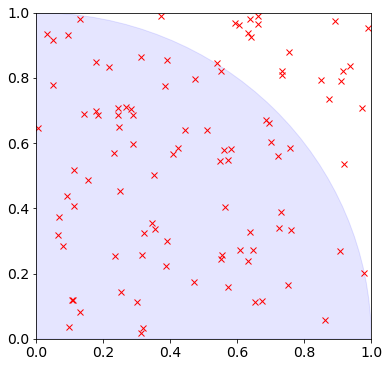

In [3]:
R = np.random.rand(100,2)     #Generate uniform random numbers in [0,1]^2

f, ax = plt.subplots(1,1, figsize = (6,6))
ax.plot(R[:,0], R[:,1], 'xr')


from matplotlib.patches import Wedge
circ = Wedge((0,0), 1, 0,90, alpha = 0.1, color = 'blue')
ax.add_patch(circ)
ax.axis([0,1,0,1])

mc = np.mean(np.sum(R**2, axis = 1) <= 1,axis = 0)

print("MC estimate is ", mc, "with ", str(R.shape[0]), " samples")
print("True area is \pi/4 = ", np.pi/4)

Text(0.5, 1.0, 'Error in Monte Carlo estimator')

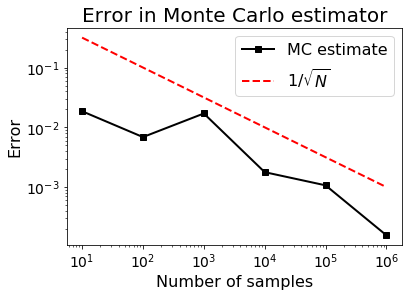

In [4]:
## Plot the convergence of the MC estimator

nlst = 10**np.arange(1,7)
R = np.random.rand(10**6,2)    

Imc = np.zeros((nlst.size,),  dtype = 'd')
for j,n in enumerate(nlst):
    Imc[j] = np.mean(np.sum(R[:n,:]**2, axis = 1) <= 1,axis = 0)
    
I = np.pi/4.
err = np.abs(Imc-I)/np.abs(I)

plt.loglog(nlst,err, 'ks-', linewidth = 2.0)
plt.loglog(nlst,1./np.sqrt(nlst), 'r--', lw = 2.0)
plt.xlabel('Number of samples', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.legend({'MC estimate','$1/\sqrt{N}$'}, fontsize = 16)
plt.title('Error in Monte Carlo estimator', fontsize = 20)

## Volume of a hypersphere

The n-dimensional volume of a sphere of radius $r$ in a $d$-dimensional space is (according to Wikipedia)

$$ V_d(r) = \frac{\pi^{d/2}}{\Gamma(\frac{d}{2} + 1)} r^d.$$

This formula is known analytically, but we can compute $V_d(1)$ using Monte Carlo integration. First, we write as the integral 

$$ I_d = 2^d \int_{0}^1 \dots \int_{0}^1 \mathbb{I}\left( \sum_{i=1}^d x_i^2 \leq 1\right) dx_1\dots dx_d,$$
where $\mathbb{I}$ is an indicator random variable defined in analogy with the previous section. 

The Monte Carlo estimator described in the previous section can be extended to higher dimensions. We omit a detailed statement. 

Text(0.5, 1.0, 'Volume of a hypersphere')

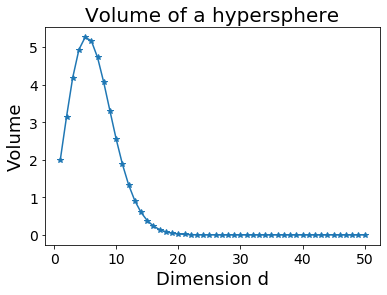

In [5]:
from scipy.special import gamma
d = np.arange(1.,51.)

V = np.pi**(d/2)/gamma(d/2+1)

plt.plot(d,V,'*-')
plt.xlabel('Dimension d', fontsize = 18)
plt.ylabel('Volume', fontsize = 18)
plt.title('Volume of a hypersphere', fontsize = 20)

This formula is interesting because it says that in "high dimensions", the volume of the hypersphere contained inside the 
domain $[-1,1]^d$ first increases with the dimension, and then goes to zero. In other words, in "high dimensions" most of the "space" is in the corners.

Text(0.5, 1.0, 'Monte Carlo estimate with N = 50000 samples')

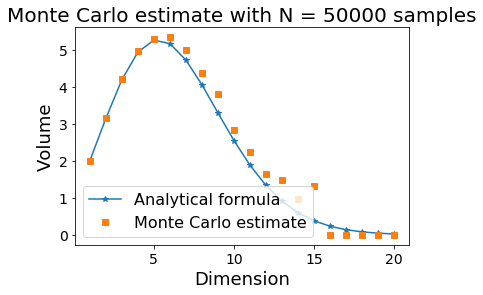

In [6]:
dmax = 20
ns   = 50000
R = np.random.rand(ns, dmax)

# Analytical formula
d = np.arange(1.,dmax+1)
V = np.pi**(d/2)/gamma(d/2+1)

# Monte Carlo estimate
vol = (2.**d)*np.mean(np.cumsum(R**2, axis = 1) <= 1,axis = 0)

plt.plot(d,V,'*-', d, vol, 's')
plt.xlabel('Dimension', fontsize = 18)
plt.ylabel('Volume', fontsize = 18)
plt.legend({'Analytical formula', 'Monte Carlo estimate'}, fontsize = 16)
plt.title('Monte Carlo estimate with N = ' + str(ns) + ' samples', fontsize = 20)

From this plot, we can make several observations: 
    
* Monte Carlo methods are applicable to high dimensional integrals.
* For this application, the MC method was more "accurate" for lower dimensions, than for higher dimensions. 
* In this example, as we go to higher dimensions, hitting the sphere becomes harder and harder (becomes a rare event). This is reflected in the accuracy of the MC estimate.